In [43]:
!pip install moval
!pip install statannotations
!pip install pandas
!pip install tqdm
!pip install matplotlib
!pip install seaborn==0.12 # because statannotations not support the latest

  Using cached seaborn-0.11.2-py3-none-any.whl (292 kB)
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.12.0
    Uninstalling seaborn-0.12.0:
      Successfully uninstalled seaborn-0.12.0


  Using cached seaborn-0.12.0-py3-none-any.whl (285 kB)
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.11.2
    Uninstalling seaborn-0.11.2:
      Successfully uninstalled seaborn-0.11.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
statannotations 0.6.0 requires seaborn<0.12,>=0.9.0, but you have seaborn 0.12.0 which is incompatible.


In [44]:
import os
import gdown
import itertools
from matplotlib.patches import Patch
import zipfile
import pandas as pd
import numpy as np
import moval
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
from statannotations.Annotator import Annotator

In [21]:
print(f"The installed MOVAL verision is {moval.__version__}")
print(f"The installed seaborn verision is {sns.__version__}")

The installed MOVAL verision is 0.2.5
The installed seaborn verision is 0.12.0


In [22]:
# cls, acc

In [68]:
# cls, all conditions (95 + 95 + 7)
with open('cls_acc.npy', 'rb') as f:
    cifar10_acc_res = np.load(f)
    cifar10_acc_gt = np.load(f)
    cifar10_acc_res_ensemble = np.load(f)
    cifar100_acc_res = np.load(f)
    cifar100_acc_gt = np.load(f)
    cifar100_acc_res_ensemble = np.load(f)
    skin_acc_res = np.load(f)
    skin_acc_gt = np.load(f)
    skin_acc_res_ensemble = np.load(f)

In [69]:
with open('seg3d_f1.npy', 'rb') as f:
    prostate_syn_f1_res = np.load(f)
    prostate_syn_f1_gt = np.load(f)
    prostate_syn_f1_res_ensemble = np.load(f)
    prostate_nat_f1_res = np.load(f)
    prostate_nat_f1_gt = np.load(f)
    prostate_nat_f1_res_ensemble = np.load(f)
    brain_syn_f1_res = np.load(f)
    brain_syn_f1_gt = np.load(f)
    brain_syn_f1_res_ensemble = np.load(f)
    brain_nat_f1_res = np.load(f)
    brain_nat_f1_gt = np.load(f)
    brain_nat_f1_res_ensemble = np.load(f)

In [70]:
# do the plots

In [71]:
# MCP | CS TS
dataset = "HAM"
mode = "classification"
metric = "accuracy"
confidence_scores = "max_class_probability-conf"
estim_algorithm = "ts-model"
class_specific = True
ckpt_savname = f"./{dataset}_{mode}_{metric}_{confidence_scores}_{estim_algorithm}_{class_specific}.pkl"
moval_model = moval.MOVAL.load(ckpt_savname)

In [72]:
valp = moval_model.fitted_perf

In [73]:
meanv = np.mean(valp)

In [74]:
rest = skin_acc_gt[0, :]

In [75]:
rest

array([0.43309434, 0.59230369, 0.61666667, 0.57602731, 0.87      ,
       0.6639478 , 0.99016918])

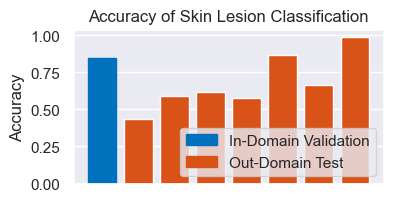

In [76]:
plt.figure(figsize=(4, 2))
sns.set_theme(style="darkgrid")

# Data
data = [meanv, 0.43309434, 0.59230369, 0.61666667, 0.57602731, 0.87      ,
       0.6639478 , 0.99016918]

# Create an array for indices
indices = np.arange(len(data))

# Create the plot
bars = plt.bar(indices, data, color='#D95319')

# Highlight the first bar
bars[0].set_color('#0072BD')

# Add titles and labels
plt.title('Data Visualization with Highlighted First Data Point')
plt.xlabel('')
plt.ylabel('Accuracy')
plt.xticks([])

plt.title('Accuracy of Skin Lesion Classification')

# Create custom patches for the legend
first_bar_legend = Patch(color='#0072BD', label='In-Domain Validation')
other_bars_legend = Patch(color='#D95319', label='Out-Domain Test')

# Add the legend
plt.legend(handles=[first_bar_legend, other_bars_legend], loc='lower right')

# Show the plot
plt.show()

In [77]:
# MCP | CS TS
dataset = "Brainlesionlas"
mode = "segmentation"
metric = "f1score"
confidence_scores = "max_class_probability-conf"
estim_algorithm = "ts-model"
class_specific = True
ckpt_savname = f"./{dataset}_{mode}_{metric}_{confidence_scores}_{estim_algorithm}_{class_specific}.pkl"
moval_model = moval.MOVAL.load(ckpt_savname)

In [61]:
valp = moval_model.fitted_perf

In [62]:
valp = np.array(valp)

In [63]:
meanv = np.mean(valp[:, 1])

In [64]:
rest = brain_nat_f1_gt[:, 0, 0, 0]

In [65]:
rest

array([0.26122825, 0.50768389, 0.61256742, 0.45862333, 0.56658269,
       0.25634622, 0.59493076, 0.62518048, 0.09910214, 0.51757531,
       0.53242619, 0.49217011])

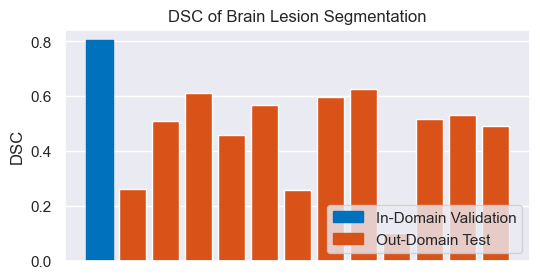

In [67]:
plt.figure(figsize=(6, 2))
sns.set_theme(style="darkgrid")

# Data
data = [meanv, 0.26122825, 0.50768389, 0.61256742, 0.45862333, 0.56658269,
        0.25634622, 0.59493076, 0.62518048, 0.09910214, 0.51757531,
        0.53242619, 0.49217011]

# Create an array for indices
indices = np.arange(len(data))

# Create the plot
bars = plt.bar(indices, data, color='#D95319')

# Highlight the first bar
bars[0].set_color('#0072BD')

# Add titles and labels
plt.title('Data Visualization with Highlighted First Data Point')
plt.xlabel('')
plt.ylabel('DSC')
plt.xticks([])

plt.title('DSC of Brain Lesion Segmentation')

# Create custom patches for the legend
first_bar_legend = Patch(color='#0072BD', label='In-Domain Validation')
other_bars_legend = Patch(color='#D95319', label='Out-Domain Test')

# Add the legend
plt.legend(handles=[first_bar_legend, other_bars_legend], loc='lower right')

# Show the plot
plt.show()